In [10]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def apply_convolution_filters(image_path):
    # 1. Load the image
    img = cv2.imread(input_image_path)
    if img is None:
        print("Error: Could not read image.")
        return None, None, None, None # Return None for all if error

    # 2. Define Kernel Size
    # Larger kernel = stronger blur effect
    size = 15

    # --- TECHNIQUE 1: BOX BLUR (General Smoothing) ---
    # Creates a square kernel filled with ones, normalized by kernel area
    kernel_box = np.ones((size, size), np.float32) / (size * size)
    box_blur = cv2.filter2D(img, -1, kernel_box)

    # --- TECHNIQUE 2: HORIZONTAL MOTION BLUR ---
    # Fills only the middle row with ones to simulate horizontal movement
    kernel_h = np.zeros((size, size))
    kernel_h[int((size - 1)/2), :] = np.ones(size)
    kernel_h /= size # Normalize to maintain brightness
    horiz_blur = cv2.filter2D(img, -1, kernel_h)

    # --- TECHNIQUE 3: VERTICAL MOTION BLUR ---
    # Fills only the middle column with ones to simulate vertical movement
    kernel_v = np.zeros((size, size))
    kernel_v[:, int((size - 1)/2)] = np.ones(size)
    kernel_v /= size # Normalize to maintain brightness
    vert_blur = cv2.filter2D(img, -1, kernel_v)

    # 3. Display Results (still displaying for visual confirmation)
    cv2_imshow(img)
    cv2_imshow(box_blur)
    cv2_imshow(horiz_blur)
    cv2_imshow(vert_blur)

    return img, box_blur, horiz_blur, vert_blur # Return all processed images

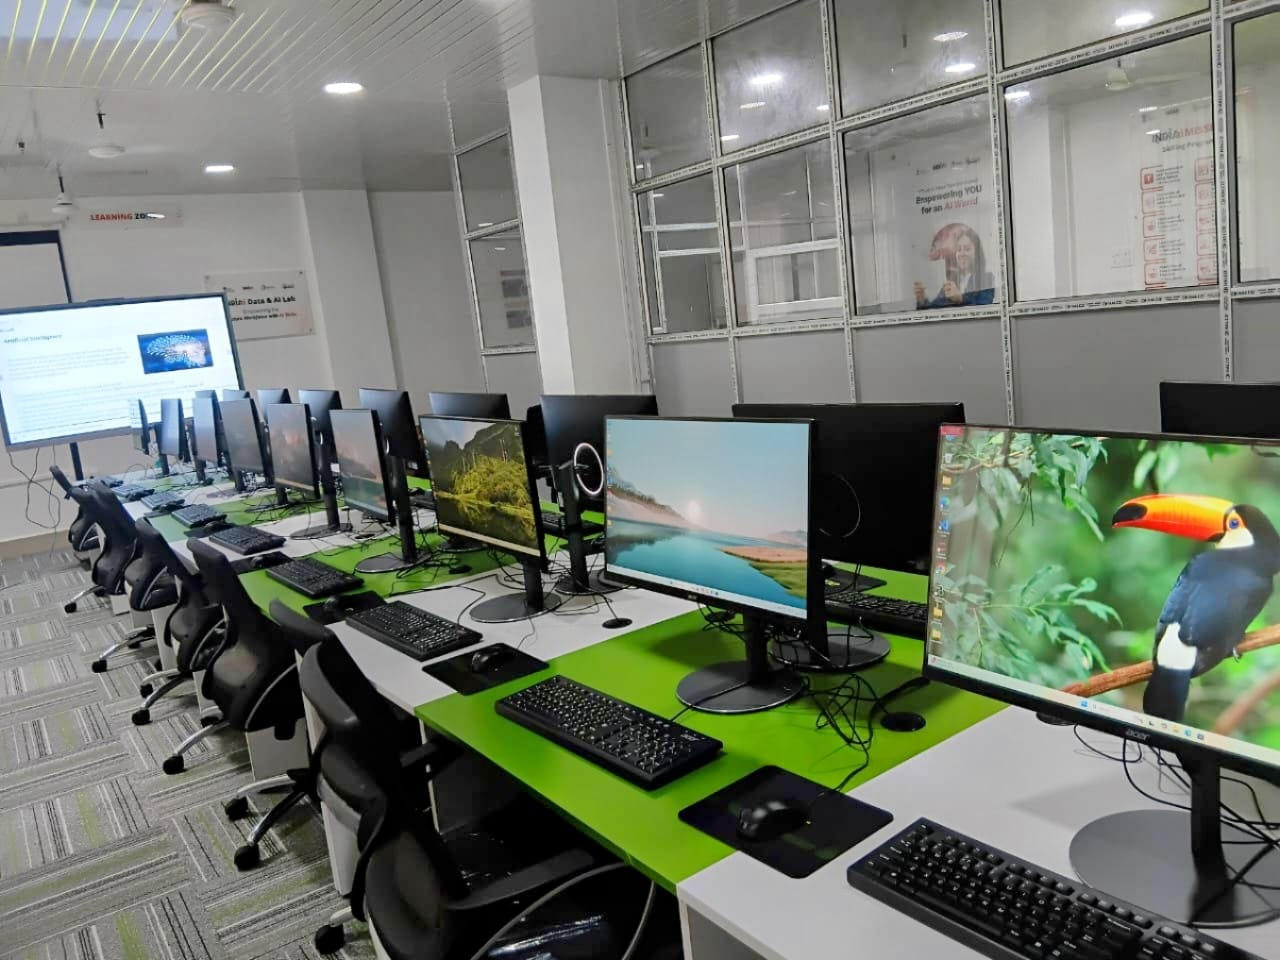

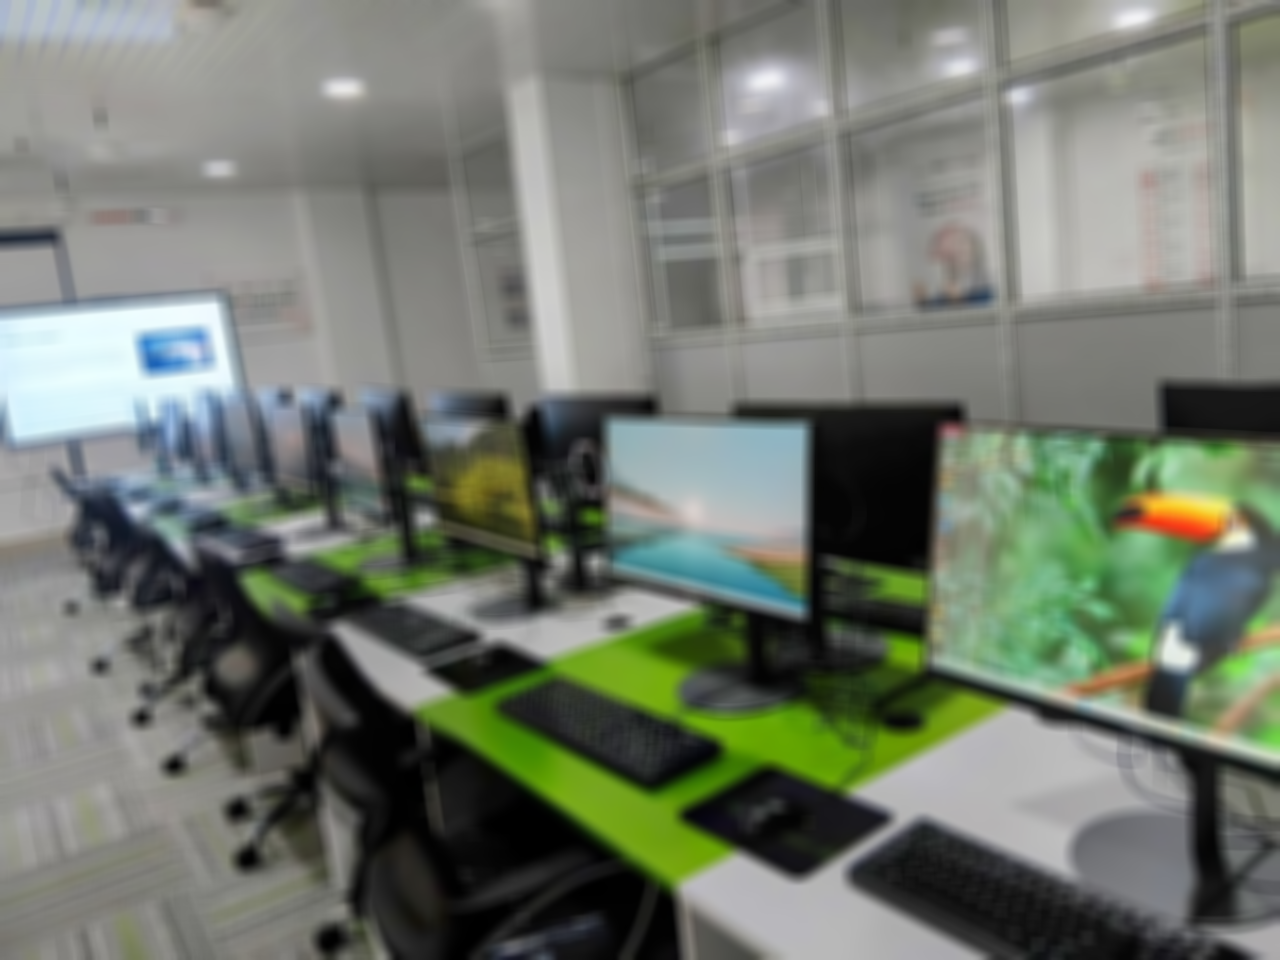

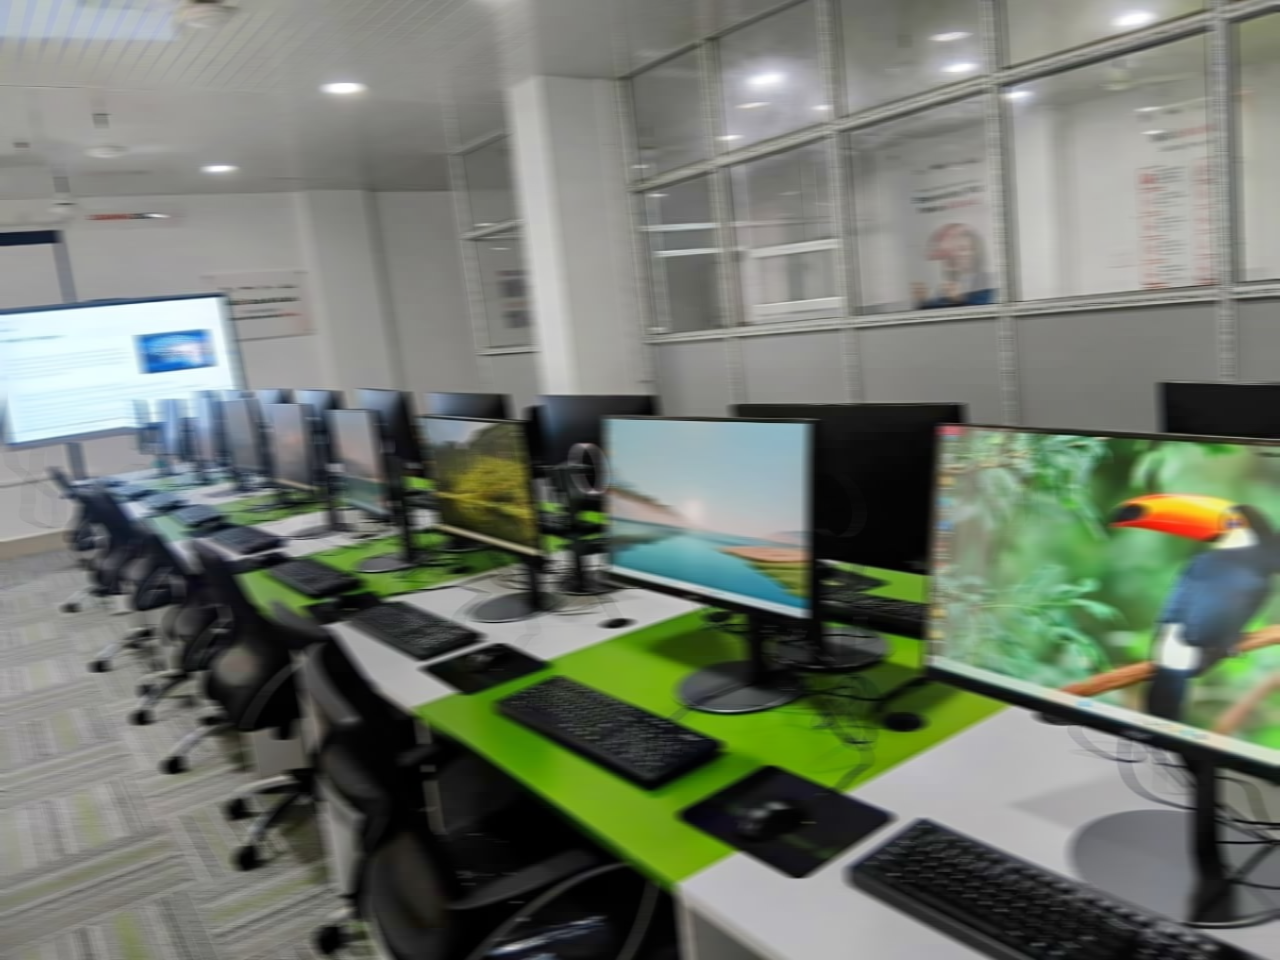

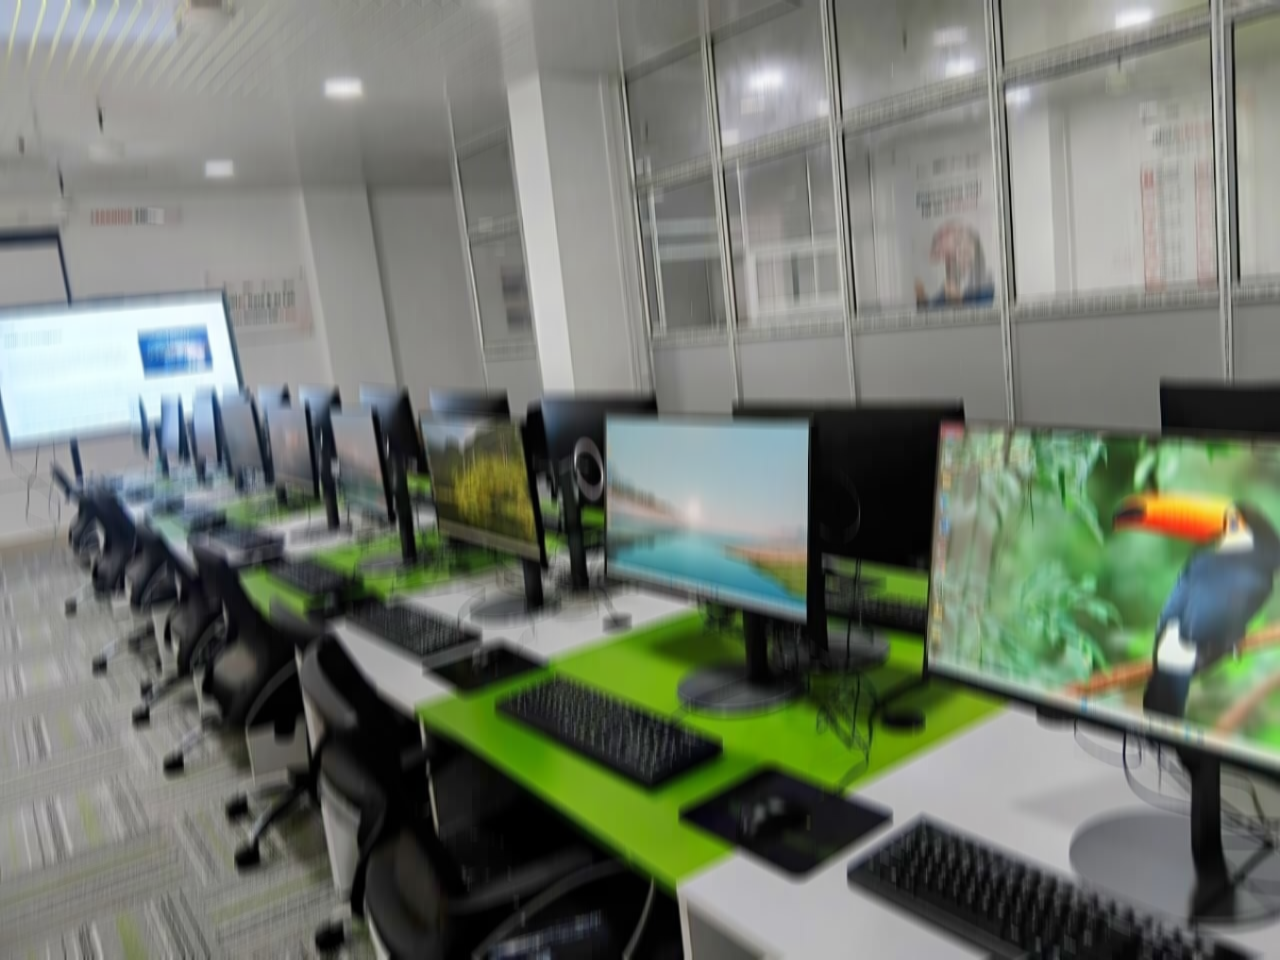

Images saved to /content/output_images/


In [6]:
import os

# Define the input image path
input_image_path = '/content/6.jpg'

# Define the output directory
output_dir = '/content/output_images/'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Apply filters and get the returned images
original_img, box_blur_img, horiz_blur_img, vert_blur_img = apply_convolution_filters(input_image_path)

# Save the images if they were successfully processed
if original_img is not None:
    cv2.imwrite(os.path.join(output_dir, 'original_6.jpg'), original_img)
    cv2.imwrite(os.path.join(output_dir, 'box_blur_6.jpg'), box_blur_img)
    cv2.imwrite(os.path.join(output_dir, 'horizontal_blur_6.jpg'), horiz_blur_img)
    cv2.imwrite(os.path.join(output_dir, 'vertical_blur_6.jpg'), vert_blur_img)
    print(f"Images saved to {output_dir}")
else:
    print("Image processing failed, no images were saved.")